In [100]:
import numpy as np
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
import heapq
from collections import defaultdict
import matplotlib.pyplot as plt

In [101]:
# general data loading
#read nodelist
nodelist = np.loadtxt('nodelist.txt')
nodelist = nodelist.astype(int)

arclist = np.loadtxt('arclist.txt')
#drop all cloumns except the first two
arclist = arclist[:,0:2]
# convert justJUST  the first column of arclist to int
arclist[:, 0] = arclist[:, 0].astype(int)



In [102]:
#source node
vs = 1

ls = 0
big_T = {vs}
big_P = set()
big_V = list(range(1, len(nodelist)))
min_distance = float("inf")

labels = {vs:0}

nodelist[1]
print(big_V)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [103]:

n_nodes = len(nodelist)-1
outgoing = [0] * n_nodes
line_number = 0
predecessor = {}

neighbor = defaultdict(list)
for i in range(0, n_nodes):
    outgoing[i] = nodelist[i+1] - nodelist[i]
    for j in range(0, outgoing[i]):
        neighbor[i+1].append(tuple(arclist[line_number+j]))
    line_number = line_number + outgoing[i]

print(neighbor)
    



defaultdict(<class 'list'>, {1: [(np.float64(2.0), np.float64(0.002166)), (np.float64(491.0), np.float64(0.00346)), (np.float64(7388.0), np.float64(0.001744)), (np.float64(2323.0), np.float64(0.003568))], 2: [(np.float64(9026.0), np.float64(0.000873)), (np.float64(1.0), np.float64(0.002166))], 3: [(np.float64(4.0), np.float64(0.008608)), (np.float64(8370.0), np.float64(0.0019))], 4: [(np.float64(149.0), np.float64(0.000633)), (np.float64(3.0), np.float64(0.008608)), (np.float64(3726.0), np.float64(1000000.0))], 5: [(np.float64(6.0), np.float64(0.002266)), (np.float64(6267.0), np.float64(0.001221)), (np.float64(8463.0), np.float64(0.000481)), (np.float64(6363.0), np.float64(0.000805))], 6: [(np.float64(781.0), np.float64(0.005593)), (np.float64(5.0), np.float64(0.002266))], 7: [(np.float64(8.0), np.float64(0.000341)), (np.float64(3717.0), np.float64(0.000971)), (np.float64(8048.0), np.float64(0.000224))], 8: [(np.float64(6028.0), np.float64(0.002471)), (np.float64(7.0), np.float64(0.000

In [104]:
for vj in big_V:
    if vj == vs:
        labels[vj] = 0
    else:
        labels[vj] = float('inf')

while big_T:
    min_distance = float('inf')
    for vj in big_T:
        current_distance = labels[vj]
        if current_distance < min_distance:
            min_distance = current_distance 
            vi = vj 
    big_P.add(vi)
    big_T.remove(vi)
    for vj, weight in neighbor[vi]:
        if vj not in big_P and vj not in big_T:
            labels[vj] = labels[vi] + weight
            predecessor[vj] = vi
            big_T.add(vj)
        elif vj in big_T and labels[vi] + weight < labels[vj]:
            labels[vj] = labels[vi] + weight
            predecessor[vj] = vi



In [105]:
def get_predecessor_path(predecessor, target_node):
    path = []
    current_node = target_node
    while current_node in predecessor:
        path.append(current_node)
        current_node = predecessor[current_node]
    path.append(current_node)  # Startknoten hinzufügen
    path.reverse()  # Pfad umkehren, um vom Startknoten zum Zielknoten zu gehen
    return path

# Beispielaufruf
target_node = 9328  # Ersetzen Sie dies durch den gewünschten Zielknoten
path = get_predecessor_path(predecessor, target_node)
print("Pfad:", path)

Pfad: [1, np.float64(2.0), np.float64(9026.0), np.float64(8029.0), np.float64(888.0), np.float64(6847.0), np.float64(1453.0), np.float64(6846.0), np.float64(8036.0), np.float64(1447.0), np.float64(9023.0), np.float64(8035.0), np.float64(7214.0), np.float64(5758.0), np.float64(5752.0), np.float64(8033.0), np.float64(1464.0), np.float64(8034.0), np.float64(6355.0), np.float64(1853.0), np.float64(432.0), np.float64(1475.0), np.float64(1471.0), np.float64(5477.0), np.float64(6122.0), np.float64(3653.0), np.float64(194.0), np.float64(3652.0), np.float64(1842.0), np.float64(7245.0), np.float64(1844.0), np.float64(7246.0), np.float64(7247.0), np.float64(1845.0), np.float64(195.0), np.float64(175.0), np.float64(822.0), np.float64(827.0), np.float64(828.0), np.float64(179.0), np.float64(55.0), np.float64(56.0), np.float64(57.0), np.float64(2147.0), np.float64(6117.0), np.float64(343.0), np.float64(3767.0), np.float64(7254.0), np.float64(112.0), np.float64(230.0), np.float64(863.0), np.float64(3

In [106]:
# read in nodepl.txt
nodepl = np.loadtxt('nodepl.txt')
#convert to pandas df
nodepl = pd.DataFrame(nodepl, columns=['x', 'y'])
# add a column with the node number whih is the index
nodepl['node'] = nodepl.index + 1

# turn path into a array with integer values
path = np.array(path).astype(int)


# make path into a pandas df with one column
path = pd.DataFrame(path, columns=['node'])
# join path with nodepl by node
path = pd.merge(path, nodepl, on='node', how='left')
# print all of path, no truncation
pd.set_option('display.max_rows', None)
print(path)

#export path to csv
path.to_csv('path.csv', index=False)

     node          x          y
0       1  47.052709  15.440467
1       2  47.053029  15.441185
2    9026  47.053243  15.441667
3    8029  47.053553  15.442405
4     888  47.053719  15.442773
5    6847  47.054049  15.442452
6    1453  47.054953  15.441671
7    6846  47.055556  15.441126
8    8036  47.055743  15.440985
9    1447  47.056018  15.440936
10   9023  47.057216  15.440785
11   8035  47.057364  15.440760
12   7214  47.057537  15.440735
13   5758  47.058293  15.440631
14   5752  47.058378  15.440608
15   8033  47.058885  15.440534
16   1464  47.059407  15.440477
17   8034  47.059936  15.440406
18   6355  47.060242  15.440363
19   1853  47.060569  15.440308
20    432  47.061268  15.440197
21   1475  47.061831  15.440111
22   1471  47.062435  15.440039
23   5477  47.062534  15.440034
24   6122  47.062758  15.439992
25   3653  47.063198  15.439947
26    194  47.064149  15.439824
27   3652  47.064554  15.440204
28   1842  47.064599  15.440573
29   7245  47.064580  15.440694
30   184

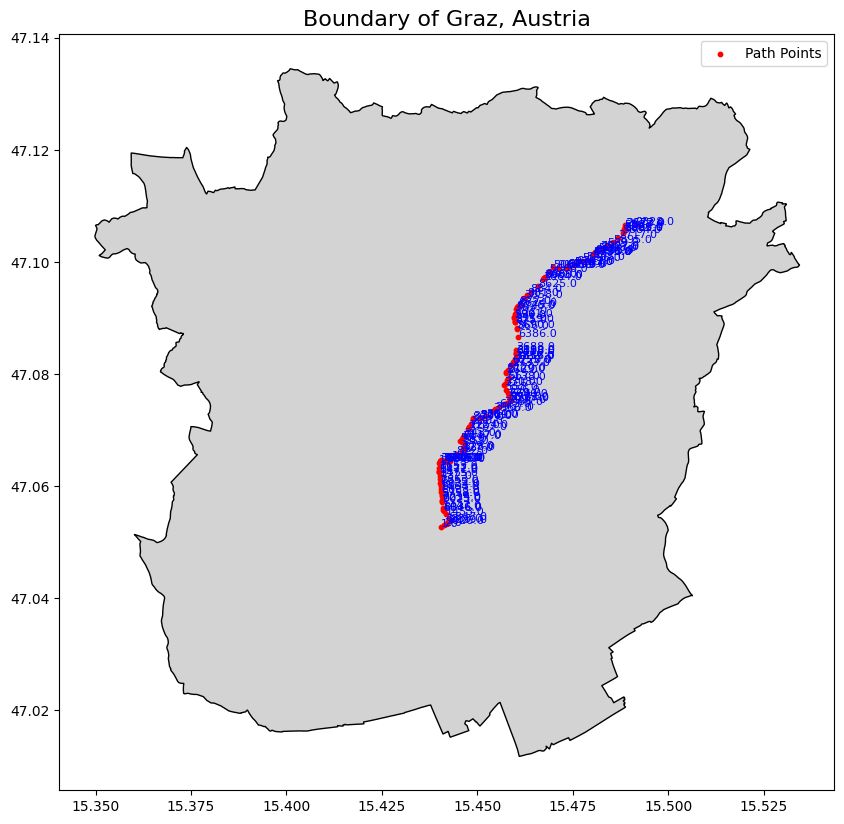

In [107]:
import osmnx as ox

# Download the boundary of Graz, Austria
place_name = "Graz, Austria"
graz = ox.geocode_to_gdf(place_name)

# Plot the boundary of Graz
fig, ax = plt.subplots(figsize=(10, 10))
graz.plot(ax=ax, edgecolor='black', facecolor='lightgray')
ax.set_title("Boundary of Graz, Austria", fontsize=16)

# Add the points from the path dataframe
ax.scatter(path['y'], path['x'], color='red', s=10, label='Path Points')

# Add labels to the path points
for i, row in path.iterrows():
    ax.annotate(row['node'], (row['y'], row['x']), fontsize=8, color='blue')

plt.legend()
plt.show()
